<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>
    


<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Osemekhian Ehilen
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 5 for Convolutional Neural Networks (Part 3, Chapter 2, Section 3).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2021/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks).
- Here we will work on TensorFlow Dataset [cifar100](https://www.tensorflow.org/datasets/catalog/cifar100).


# Notebook Configuration

## Google drive

In [ ]:
# IF YOU ARE NOT USING GOOGLE COLAB YOU CAN COMMENT
# OUT THE from google.colab import drive AND drive.mount('/content/drive')
# THEN MAKE YOUR OWN PATH abspath_curr
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')
#"G:\My Drive\Colab Notebooks\code"

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

## **Loading Dataset**

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'data_cifar100')
if not os.path.exists(directory):
    os.makedirs(directory)
#---------------------------------------------------
# Downloading the data to the directory

import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'cifar100'

# load data
data, info= tfds.load(name=data_name, data_dir= abspath_curr + 'data_cifar100',
                      as_supervised=True,
                      with_info=True)
# name of target variable
target= 'label'


## **Getting the Info**

In [ ]:
info.splits

{'test': <tfds.core.SplitInfo num_examples=10000>,
 'train': <tfds.core.SplitInfo num_examples=50000>}

## Classes

In [ ]:
classes= info.features[target].names
# print classes
classes 

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

## Number of Classes

In [ ]:
n_classes= info.features[target].num_classes
# print number of classes
n_classes

100


## **Getting training and validation and test data**

In [ ]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + 'data_cifar100',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + 'data_cifar100',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + 'data_cifar100',
                      as_supervised=True)

## **Resizing the Data for Pretrained Model**

In [ ]:
# Set the default input size for the pretrained model
global input_size
input_size = [224, 224]

def resize(data, label):
    """
    Resize the data into the default input size of the pretrained model

    Parameters
    ----------
    data: the data
    label: the label
    
    Returns
    ----------
    The resized data and label
    """

    # Resize the data into the default input size of the pretrained model
    data_resized = tf.image.resize(data, input_size)

    return data_resized, label

def preprocess_pretrain(data, label):
    """
    Preprocess the data using pretrained model

    Parameters
    ----------
    data: the data
    label: the label
    
    Returns
    ----------
    The preprocessed data using pretrained model
    """

    # Preprocess the data
    data_preprocessed = preprocess_input(data)

    return data_preprocessed, label

In [ ]:
# Resize the training data
data_train = data_train.map(resize)

# Resize the validation data
data_valid = data_valid.map(resize)

# Resize the test data
data_test = data_test.map(resize)

## **Preprocessing the data using pretrained model**

In [ ]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

# data, info=preprocess_input(data)

## **Shuffling, batching and prefetching the data**

In [ ]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

In [ ]:
# Implement me

## **Making directory for the model**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/DNN_model_cifar100/')
if not os.path.exists(directory):
    os.makedirs(directory)

## **Building the architecture of the model**

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.ResNet50(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

## **Freezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## **Setting Callbacks**

In [ ]:
# ModelCheckpoint callback to_save_the_model
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/DNN_model_cifar100/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)


# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback #Performance Scheduling
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=2)

## **Compiling the Model**

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

## **Training the Model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=6,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/6
2188/2188 [==============================] - 113s 48ms/step - loss: 1.5503 - accuracy: 0.5931 - val_loss: 1.3498 - val_accuracy: 0.6561 - lr: 0.0010
Epoch 2/6
2188/2188 [==============================] - 104s 47ms/step - loss: 0.9216 - accuracy: 0.7372 - val_loss: 1.3249 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 3/6
2188/2188 [==============================] - 104s 47ms/step - loss: 0.6855 - accuracy: 0.7958 - val_loss: 1.3222 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 4/6
2188/2188 [==============================] - 102s 46ms/step - loss: 0.5356 - accuracy: 0.8324 - val_loss: 1.3264 - val_accuracy: 0.6969 - lr: 0.0010
Epoch 5/6
2188/2188 [==============================] - 102s 46ms/step - loss: 0.4376 - accuracy: 0.8588 - val_loss: 1.3573 - val_accuracy: 0.7012 - lr: 0.0010


## **Learning curve**

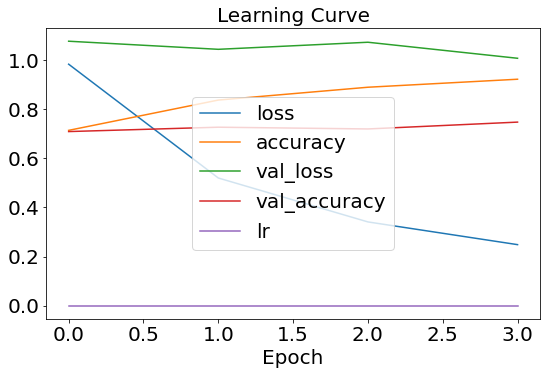

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/DNN_figure_cifar100/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.legend(loc='center')
plt.title("Learning Curve")
plt.xlabel('Epoch')
plt.savefig(abspath_curr + 'result/DNN_figure_cifar100/learning_curve.pdf')
plt.show()

## **Unfreezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## **Compiling the model**

In [ ]:
# Here we use a lower learning rate (by a factor of 10) of Adam optimizer, 
# so that it is less likely to compromise the pretrained weights.

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **Re-Training the Model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=4,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/4
2188/2188 [==============================] - 265s 117ms/step - loss: 0.9836 - accuracy: 0.7140 - val_loss: 1.0772 - val_accuracy: 0.7091 - lr: 1.0000e-04
Epoch 2/4
2188/2188 [==============================] - 259s 118ms/step - loss: 0.5199 - accuracy: 0.8374 - val_loss: 1.0442 - val_accuracy: 0.7269 - lr: 1.0000e-04
Epoch 3/4
2188/2188 [==============================] - 257s 117ms/step - loss: 0.3410 - accuracy: 0.8897 - val_loss: 1.0730 - val_accuracy: 0.7197 - lr: 1.0000e-04
Epoch 4/4
2188/2188 [==============================] - 258s 117ms/step - loss: 0.2484 - accuracy: 0.9223 - val_loss: 1.0077 - val_accuracy: 0.7476 - lr: 1.0000e-04


## **Learning Curve 2**

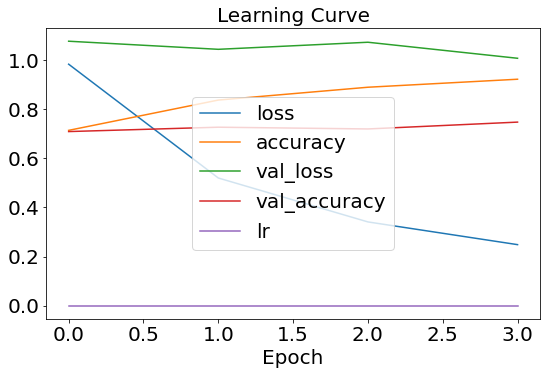

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/DNN_figure_cifar100_/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.legend(loc='center')
plt.title("Learning Curve")
plt.xlabel('Epoch')
plt.savefig(abspath_curr + 'result/DNN_figure_cifar100/learning_curve2.pdf')
plt.show()

# Testing

### **Loading the saved model**

In [ ]:
# Load the saved model
model.load_weights(filepath=abspath_curr + 'result/DNN_model_cifar100/model.h5')

## **Evaluating Model**

In [ ]:
loss, accuracy= model.evaluate(data_test)

625/625 [==============================] - 20s 32ms/step - loss: 1.0263 - accuracy: 0.7386


## **Reference**



*   The pipeline for this Deep Neural Network is credited to [Yuxiao Huang](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2022/code/p3_deep_learning/p3_c2_supervised_learning)

